# Word cloud

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from nrclex import NRCLex
import nltk
import spacy
nltk.download('punkt')


nlp = spacy.load('en_core_web_md')


/opt/homebrew/anaconda3/envs/py3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariabarbosa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
## Importar o ficheiro csv
df = pd.read_csv('mypersonality.csv', index_col=False,sep=',', encoding='ISO 8859-1')
print(df.head())

                            #AUTHID  \
0  b7b7764cfa1c523e4e93ab2a79a946c4   
1  b7b7764cfa1c523e4e93ab2a79a946c4   
2  b7b7764cfa1c523e4e93ab2a79a946c4   
3  b7b7764cfa1c523e4e93ab2a79a946c4   
4  b7b7764cfa1c523e4e93ab2a79a946c4   

                                              STATUS  sEXT  sNEU  sAGR  sCON  \
0                        likes the sound of thunder.  2.65   3.0  3.15  3.25   
1  is so sleepy it's not even funny that's she ca...  2.65   3.0  3.15  3.25   
2  is sore and wants the knot of muscles at the b...  2.65   3.0  3.15  3.25   
3         likes how the day sounds in this new song.  2.65   3.0  3.15  3.25   
4                                        is home. <3  2.65   3.0  3.15  3.25   

   sOPN cEXT cNEU cAGR cCON cOPN               DATE  NETWORKSIZE  BETWEENNESS  \
0   4.4    n    y    n    n    y  06/19/09 03:21 PM        180.0      14861.6   
1   4.4    n    y    n    n    y  07/02/09 08:41 AM        180.0      14861.6   
2   4.4    n    y    n    n    y  06/15/0

In [46]:
# update classifiers to integer value
df['cNEU'] = df['cNEU'].map({'n': 0, 'y': 1})
df['cAGR'] = df['cAGR'].map({'n': 0, 'y': 1})
df['cCON'] = df['cCON'].map({'n': 0, 'y': 1})
df['cOPN'] = df['cOPN'].map({'n': 0, 'y': 1})
df['cEXT'] = df['cEXT'].map({'n': 0, 'y': 1})

## Análise dataset

In [4]:
print("O DataSet possui " + str(len(df)) + " entradas!")

O DataSet possui 9917 entradas!


In [72]:
## Verficar se quando um post é Openness, quantas vezes é Agreeableness ou Extroversion;
c = 0
for row in df.itertuples():
    if (row.cOPN == 1 and row.cEXT == 1 and row.cAGR == 1):
        c = c +1   
   
print(c)

# c = 423, ou seja em 423 textos de 2467 estão classificados com os 3 valores. Isto n parece ser um problema.


423


In [73]:
missing = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100,2)
missing_info = pd.concat([missing],keys=['Missing values'],axis=1)
missing_info.style.background_gradient()

,Missing values
#AUTHID,0.000000
TEXT,0.000000
cEXT,0.000000
cNEU,0.000000
cAGR,0.000000
cCON,0.000000
cOPN,0.000000
split,0.000000


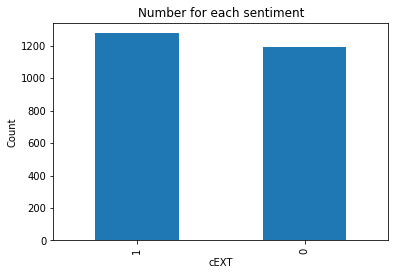

In [15]:
series = df['cEXT'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('cEXT')
ax.set_ylabel('Count')
plt.show()

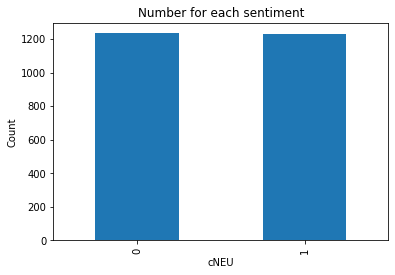

In [17]:
series = df['cNEU'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('cNEU')
ax.set_ylabel('Count')
plt.show()

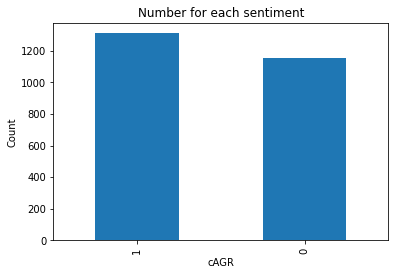

In [18]:
series = df['cAGR'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('cAGR')
ax.set_ylabel('Count')
plt.show()

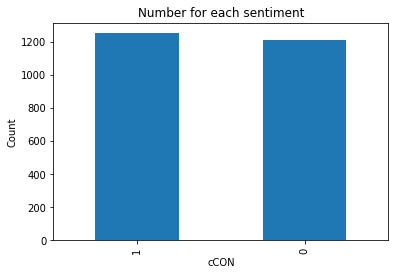

In [20]:
series = df['cCON'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('cCON')
ax.set_ylabel('Count')
plt.show()

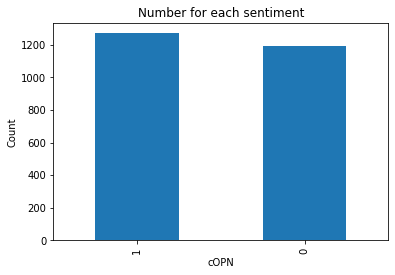

In [22]:
series = df['cOPN'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('cOPN')
ax.set_ylabel('Count')
plt.show()

Os 5 gráficos anteriores mostram que o dataset esta balanceado. Encontrando-se uma amostra representativa de todas os cinco traços de personalidade.

## Tratamento do dataset

In [47]:
# Função que faz lematização, retira pontuação e stop words, coloca o texto em minusculas
def dataPrep(text):
    doc = nlp(text)  
    res = " ".join([token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and (token.pos_ == "VERB" or token.pos_ == "ADJ" or token.pos_ == "NOUN")])   
    return res

In [48]:
for i in range(len(df)):
    df['STATUS'][i] = dataPrep(df['STATUS'][i])

/var/folders/7v/nzkm4hw14qv5j4fghjbfccgr0000gn/T/ipykernel_895/64402743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATUS'][i] = dataPrep(df['STATUS'][i])


In [49]:
df.to_csv('mypersonality_verbs_adj_noun.csv', index=False) 

Verificar se as palavras do dataset do tweet estão no lexico:

In [104]:
A = ['rate', 'town', 'miss', 'friend', 'people', 'new', 'sure', 'go', 'break', 'realize', 'feel', 'rambling', 'stay', 'call', 'surround', 'assume', 'mom', 'happen', 'different', 'regret', 'list', 'guy', 'get', 'leave', 'typing', 'consider', 'child', 'consciousness', 'comfortable', 'certain', 'tell', 'future', 'stream', 'movie', 'visit', 'date', 'bother', 'begin', 'couple', 'bed', 'decide', 'experience', 'come', 'hang', 'class', 'close', 'learn', 'spend', 'writing', 'sound', 'thing', 'reason', 'hurt', 'good', 'watch', 'happy', 'feeling', 'easy', 'old', 'hear', 'sleep', 'home', 'parent', 'roommate', 'help', 'meet', 'weekend', 'mean', 'room', 'assignment', 'week', 'fun', 'night', 'college', 'today', 'little', 'year', 'write', 'talk', 'way', 'guess', 'lot', 'day', 'like', 'want', 'time', 'think']
N = ['country', 'crash', 'remember', 'plane', 'pride', 'people', 'backyard', 'greek', 'twin', 'attack', 'lose', 'news', 'watch', 'life', 'tower', 'pledge', 'day', 'today', 'event', 'night', 'reassuring', 'forgetting', 'exauste', 'remembering', 'sorrow', 'prioroty', 'story', 'unite', 'overtake', 'tridelt', 'awesome', 'horrific', 'kill', 'terrorism', 'mourning', 'worship', 'campus', 'praise', 'bark', 'awe', 'girl', 'socialize', 'flag', 'dye', 'second', 'nation', 'retreat', 'participate', 'shock', 'helpful', 'bond', 'disappoint', 'occur', 'risk', 'creative', 'overcome', 'american', 'daily', 'chill', 'stranger', 'field', 'term', 'heat', 'burn', 'background', 'come', 'process', 'system', 'fun', 'quit', 'touch', 'street', 'focus', 'proud', 'join', 'save', 'fight', 'amazing', 'sorority', 'complete', 'number', 'dog', 'year', 'picture', 'time', 'one', 'go', 'know', 'hold', 'think', 'try', 'tv', 'moment', 'cry', 'begin', 'lot', 'important', 'matter', 'teacher', 'excited', 'experience', 'eye', 'house', 'class', 'sad', 'fact', 'close', 'get', 'feel', 'easy', 'thing', 'writing', 'good', 'turn', 'feeling', 'walk', 'call', 'cool', 'family', 'happy', 'old', 'happen', 'help', 'have', 'meet', 'new', 'guy', 'leave', 'love', 'look', 'hope', 'talk', 'school', 'work', 'friend', 'want']
O = ['bps', 'upload', 'amused', 'polo', 'ready', 'server', 'arrange', 'swimming', 'ache', 'bag', 'release', 'wind', 'text', 'connect', 'prepare', 'wash', 'responsibility', 'clear', 'thought', 'assignment', 'practice', 'subject', 'letter', 'water', 'conversation', 'internet', 'clock', 'set', 'guess', 'day', 'stress', 'bed', 'sense', 'point', 'book', 'finish', 'feel', 'word', 'end', 'tired', 'time', 'have', 'take', 'read', 'mind', 'today', 'little', 'minute', 'lot', 'need', 'class', 'friend', 'come', 'get']


C = ['amused', 'bps', 'polo', 'upload', 'ready', 'server', 'arrange', 'swimming', 'release', 'text', 'bag', 'ache', 'wind', 'connect', 'responsibility', 'clear', 'prepare', 'thought', 'wash', 'conversation', 'assignment', 'practice', 'subject', 'letter', 'water', 'internet', 'clock', 'set', 'guess', 'sense', 'day', 'point', 'stress', 'bed', 'book', 'word', 'finish', 'feel', 'end', 'time', 'tired', 'have', 'read', 'mind', 'take', 'little', 'today', 'minute', 'lot', 'need', 'friend', 'come', 'class', 'get'] 

E = ['upload', 'bps', 'amused', 'polo', 'server', 'ready', 'arrange', 'swimming', 'text', 'release', 'ache', 'wind', 'bag', 'connect', 'responsibility', 'clear', 'thought', 'prepare', 'wash', 'assignment', 'practice', 'conversation', 'letter', 'subject', 'water', 'internet', 'clock', 'guess', 'set', 'sense', 'day', 'bed', 'point', 'stress', 'book', 'finish', 'word', 'feel', 'end', 'time', 'tired', 'have', 'read', 'take', 'mind', 'today', 'little', 'minute', 'lot', 'need', 'come', 'class', 'friend', 'get']

In [52]:
print(len(A),len(O),len(N))
words_lexico = set(A + O + N)
print(len(words_lexico))


87 54 136
228


In [55]:
# são 9917  entradas

text = []
words_lexico = A + O + N# O + C +E+ A+ N
c = 0
n = 0
for row in df.itertuples():
        words_twitter = row.STATUS.split()
        for w in words_twitter:
                if w in words_lexico:
                        c = c + 1
                        break
        

print(c)
print(9917 - c)
print(len(set(words_lexico)))
print('percentagem de palavras do lexico no dataser do twitter ' ,c/9917)

6887
3030
228
percentagem de palavras do lexico no dataser do twitter  0.6944640516285167


In [19]:
# são 9917  entradas

text = []
words_lexico = []
c = 0
n = 0
for row in df.itertuples():
        words_lexico = []

        if (row.cOPN == 'y'):
             words_lexico =  words_lexico + O
        if (row.cNEU == 'y'):
                 words_lexico =  words_lexico + N
        if (row.cAGR == 'y'):
               words_lexico =  words_lexico + A
        if (row.cCON == 'y'):
                words_lexico =  words_lexico + C
        if (row.cEXT == 'y'):
                 words_lexico =  words_lexico + E

        words_twitter = row.STATUS.split()

        for w in words_twitter:
                if w in words_lexico:
                        c = c + 1
                        break
        

print(c)
print(9917 - c)
print(len(set(words_lexico)))
print('percentagem de palavras do lexico no dataser do twitter ' ,c/9917)

4076
5841
92
percentagem de palavras do lexico no dataser do twitter  0.41101139457497227


# AUMENTO DO LEXICO

 recorrendo a sinonimos das palavras que o compoe

In [108]:
from nltk.corpus import wordnet as wn


def synonyms (list_words):

    synonyms_traits  = []
    for word in list_words:
        synonyms = []

        for syn in wn.synsets(word):
                for l in syn.lemmas():
                    doc = nlp(l.name())
                    s = [ str(token) for token in doc if (token.pos_ == "VERB" or token.pos_ == "NOUN" or token.pos_ == "ADJ")] 
                    synonyms = synonyms + s
        synonyms_traits = synonyms_traits + synonyms
                    
    # print(set(synonyms_traits))

    syn_final_list =  set (list_words + synonyms_traits)
    return syn_final_list

In [96]:
O_syn = synonyms (O)
A_syn = synonyms (A)
N_syn = synonyms (N)

In [107]:
noum = 0
adj = 0
verb = 0
for i,j in list(set(N_syn)):
    if (j== "VERB"):
            verb = verb + 1
    elif (j == "NOUN"):
        noum = noum + 1
    elif (j== "ADJ"):
        adj = adj + 1
(noum, adj, verb , (noum + adj + verb))



TypeError: cannot unpack non-iterable spacy.tokens.token.Token object

In [109]:
''''
ignorando big 5
'''
#doc = nlp(' '.join(list(O_syn)) )

O_syn = synonyms (O)
A_syn =synonyms (A)
N_syn =synonyms (N)





print('schizoid: ', len(O_syn), '; paranoid: ' , len(A_syn),'; Neuroticism: ', len(N_syn))

tamanho = len(list(O_syn) + list(A_syn) + list(N_syn))

tamanho_sem_repetidos = len (set(list(O_syn) +  list(A_syn) + list(N_syn)))

print('tamanho corpus sem elemntos repetidos ', tamanho_sem_repetidos, 'tamnaho real corpus ', tamanho)


print('numero de elementos repetidos ', tamanho -tamanho_sem_repetidos)

schizoid:  817 ; paranoid:  1090 ; Neuroticism:  1527
tamanho corpus sem elemntos repetidos  2411 tamnaho real corpus  3434
numero de elementos repetidos  1023


In [82]:
#or token.pos_ == "ADJ" or token.pos_ == "NOUM")
adj = 0
verb = 0
noun= 0
nlp = spacy.load('en_core_web_md')
doc = nlp(' '.join(list(O_syn)) )
for token in doc:

    if (token.pos_ == "VERB"):
            verb = verb + 1
    elif (token.pos_ == "NOUN"):
        noum = noum + 1
    elif (token.pos_ == "ADJ"):
        adj = adj + 1
    else:
         print(token.pos_)



noun,verb, adj

PROPN
PROPN
PRON
NUM
PROPN
PROPN
PROPN
PROPN
ADV
PROPN
PROPN
PROPN
PROPN
PRON
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
AUX
PROPN
X
PROPN
PROPN
PROPN
PROPN
PROPN
ADP
ADP
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PRON
NUM
PROPN
PROPN
PROPN
ADP
PROPN
AUX
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
PART
PROPN
PROPN
PROPN
PROPN
PROPN
PROPN
NUM
PROPN
PROPN
PROPN
PROPN
PROPN
AUX
AUX
X
PROPN
PROPN
ADP
AUX
PROPN
PROPN


(0, 181, 91)

In [ ]:
O_syn = synonyms (O)
C_syn =synonyms (C)
E_syn =synonyms (E)
A_syn =synonyms (A)
N_syn =synonyms (N)



tamanho = len(list(O_syn) + list(C_syn) + list(E_syn) + list(A_syn) + list(N_syn))

tamanho_sem_repetidos = len (set(list(O_syn) + list(C_syn) + list(E_syn) + list(A_syn) + list(N_syn)))

print(tamanho_sem_repetidos,tamanho )


print(tamanho -tamanho_sem_repetidos)

In [111]:
# são 9917  entradas

text = []
words_lexico = list(O_syn) + list(A_syn) + list(N_syn) #list(O_syn) + list(C_syn) + list(E_syn) + list(A_syn) + list(N_syn)
print(len(words_lexico))
c = 0
n = 0
for row in df.itertuples():
        words_twitter = row.STATUS.split()
        for w in words_twitter:
                if w in words_lexico:
                        c = c + 1
                        break
        

print(c)
print(9917 - c)
print(len(set(words_lexico)))
print('percentagem de palavras do lexico no dataser do twitter ' ,c/9917)

3434
8042
1875
2411
percentagem de palavras do lexico no dataser do twitter  0.8109307250176465


In [112]:
# são 9917  entradas
''''
PARA O BIG 5

text = []
words_lexico = []
c = 0
n = 0
for row in df.itertuples():
        words_lexico = []

        if (row.cOPN == 'y'):
             words_lexico =  words_lexico + list(O_syn)
        if (row.cNEU == 'y'):
                 words_lexico =  words_lexico + list(N_syn)
        if (row.cAGR == 'y'):
               words_lexico =  words_lexico + list(A_syn)
        if (row.cCON == 'y'):
                words_lexico =  words_lexico + list(C_syn)
        if (row.cEXT == 'y'):
                 words_lexico =  words_lexico + list(E_syn)

        words_twitter = row.STATUS.split()

        for w in words_twitter:
                if w in words_lexico:
                        c = c + 1
                        break
        

print(c)
print(9917 - c)
print(len(set(words_lexico)))
print('percentagem de palavras do lexico no dataser do twitter ' ,c/9917)

'''


text = []
words_lexico = []
c = 0
n = 0
for row in df.itertuples():
        words_lexico = []

        if (row.cOPN == 1):
             words_lexico =  words_lexico + list(O_syn)
        if (row.cNEU == 1):
                 words_lexico =  words_lexico + list(N_syn)
        if (row.cAGR == 1):
               words_lexico =  words_lexico + list(A_syn)
        if (row.cCON == 1):
                words_lexico =  words_lexico + []
        if (row.cEXT == 1):
                 words_lexico =  words_lexico + []

        words_twitter = row.STATUS.split()

        for w in words_twitter:
                if w in words_lexico:
                        c = c + 1
                        break
        

print(c)
print(9917 - c)
print(len(set(words_lexico)))
print('percentagem de classificaçao correta: ' ,c/9917)


6774
3143
2019
percentagem de classificaçao correta:  0.6830694766562468


## Análise de emoções

### EmotionMeter.com (dr ricardo)

In [114]:
'''
Funçao reponsavel por realizar analise de sentimentos aos tweets;

@author emotionsmater.com
'''
import requests

def sentimentAnalysis(list_tweets,lang):
    body = {

        "messages": list_tweets,
        "language": lang

        }

    request = requests.post("http://146.59.159.119:9777/", json = body)
    return (request.text.encode().decode('unicode-escape') , request.status_code)




In [46]:
sentimentAnalysis (['ola, tuo bem'], 'pt')

('{"ola, tuo bem":{"emotions":{"anger":0.0,"anticipation":0.0,"disgust":0.0,"fear":0.0,"joy":0.0,"sadness":0.0,"surprise":0.0,"trust":0.0},"polarities":{"negative":0.0,"positive":1.0}}}\n',
 200)

In [125]:
p = 0
n = 0
neutro = 0

import json

#data = pd.read_csv('mypersonality.csv', index_col=False,sep=',', encoding='ISO 8859-1')



words_twitter = list(N_syn)

status_code = 0 ## Valor inicial 

while (status_code != 200):
        emotions, status_code = sentimentAnalysis(words_twitter,'en')
playload_emotions = json.loads(emotions)





       # emotion['emotions']['anger']


In [126]:
n = 0
p = 0
for i,j in playload_emotions.items():
    if j['polarities']['negative'] > j['polarities']['positive']:
        n = n + 1
    elif j['polarities']['negative'] < j['polarities']['positive']:
        p = p + 1


p,n

#oPEN = (64, 49)
#A = (102, 103)

(166, 151)

In [ ]:

if list(playload_emotions.values())[0]['polarities']['negative'] == list(playload_emotions.values())[0]['polarities']['positive']:
        neutro = neutro + 1
elif list(playload_emotions.values())[0]['polarities']['negative'] > list(playload_emotions.values())[0]['polarities']['positive']:
        n = n + 1
else:
        p = p +1

print(p, n, neutro)

# Criar CSV lexico:



In [131]:
d ={ "paranoid" : list(A_syn), "schizoid": list(O_syn), "Neuroticism": list(N_syn) }

In [132]:
# Writing to sample.json
with open("MentaLex.json", "w") as outfile:
    json.dump(d, outfile)